In [1]:
%load_ext autoreload
%autoreload 2

### 2. Test the Foward part of the Network
> * Now make sure that we can map from an image into an SxSx2x11 Tensor
> * First make sure that the Yolo2 weights are loadable and make sense.

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from Model.vis_utils import visualize_grid

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# l2 = np.array(list((yolo_weights['model_weights']['conv2d_1']['conv2d_1'][u'kernel:0'])))
# grid = visualize_grid(l2.transpose(3, 1, 2, 0))
# print (grid.shape, l2.shape)
# plt.imshow(grid.astype('uint8'))
# plt.axis('off')
# plt.gcf().set_size_inches(5, 5)
# plt.show()

#### 2.1 Overfit Localizer in Tiny Data
> * For debugging, we run the foward, and backward pass for `a few`
epochs.

In [4]:
import torch
print(torch.__version__)
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from Model.dataloader import NutritionDataset
from Model.net import LocalizerNet
from train import train_localizer, calculate_iou

0.4.0


In [5]:
def train_localizer_network():
    IMAGE_DIR = '../Data/FullData/RawImages/'
    BOXES = '../Data/FullData/BoundingBoxes.npy'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    YOLO_PATH = '../Data/FullData/yolo.h5'
    debug = not torch.cuda.is_available()
    dataset = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, debug=debug),
        batch_size=45, shuffle=True, num_workers=16,
    )
    dev = DataLoader(
        NutritionDataset(IMAGE_DIR, BOXES, DATA_PATH, split='dev', debug=debug),
        batch_size=45, shuffle=True, num_workers=16,
    )
    model = LocalizerNet(YOLO_PATH)
    optimizer = torch.optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()),
        lr=1e-4
    )
    r = train_localizer(model, optimizer, dataset, dev, epochs=100)
    return r    

In [ ]:
train_losses, dev_losses, train_map, dev_map = train_localizer_network()

  1%|          | 1/143 [00:30<1:11:29, 30.21s/it]

=== Performance Check ===
	 Train Loss =  0.05217129737138748
	 Dev Loss =  0.07152197439046133
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.0119564 0.0119564 0.0119564 0.0119564]
=== Performance Check ===
	 Train Loss =  0.047267794609069824
	 Dev Loss =  0.0730665854754902
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.02243417 0.02243417 0.02243417 0.02243417]


  1%|▏         | 2/143 [00:48<57:09, 24.32s/it]  

=== Performance Check ===
	 Train Loss =  0.04827263951301575
	 Dev Loss =  0.07190593615883872
	 Train mAP =  [0.03333333 0.03333333 0.03333333 0.03333333]
	 Dev mAP =  [0.01567362 0.01475787 0.01475787 0.01305719]


  2%|▏         | 3/143 [01:07<52:14, 22.39s/it]

=== Performance Check ===
	 Train Loss =  0.05076336860656738
	 Dev Loss =  0.06966734251805715
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.04414361 0.04255631 0.04255631 0.04255631]


  3%|▎         | 4/143 [01:25<49:42, 21.45s/it]

=== Performance Check ===
	 Train Loss =  0.04613000899553299
	 Dev Loss =  0.06760034674689883
	 Train mAP =  [0.02 0.02 0.02 0.02]
	 Dev mAP =  [0.03571507 0.03571507 0.034723   0.03194007]


  3%|▎         | 5/143 [01:44<48:14, 20.98s/it]

=== Performance Check ===
	 Train Loss =  0.04909658432006836
	 Dev Loss =  0.06699547526382264
	 Train mAP =  [0.05756579 0.05756579 0.05756579 0.05756579]
	 Dev mAP =  [0.03791636 0.03543621 0.03452045 0.03332998]


  4%|▍         | 6/143 [02:03<47:04, 20.62s/it]

=== Performance Check ===
	 Train Loss =  0.04949604719877243
	 Dev Loss =  0.06819211194912593
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.03322942 0.03219423 0.03219423 0.03219423]


  5%|▍         | 7/143 [02:22<46:16, 20.42s/it]

=== Performance Check ===
	 Train Loss =  0.0493999607861042
	 Dev Loss =  0.06873276155619394
	 Train mAP =  [0.01785714 0.01785714 0.01785714 0.01785714]
	 Dev mAP =  [0.03905166 0.03713715 0.03614509 0.03333994]


  6%|▌         | 8/143 [02:42<45:40, 20.30s/it]

=== Performance Check ===
	 Train Loss =  0.0515672042965889
	 Dev Loss =  0.06842239573597908
	 Train mAP =  [0.07407407 0.07407407 0.07407407 0.07407407]
	 Dev mAP =  [0.04977358 0.04602865 0.04602865 0.0436973 ]


  6%|▋         | 9/143 [03:01<45:02, 20.17s/it]

=== Performance Check ===
	 Train Loss =  0.04814564809203148
	 Dev Loss =  0.06892820199330647
	 Train mAP =  [0.02941176 0.02941176 0.02941176 0.01470588]
	 Dev mAP =  [0.04355258 0.04289121 0.04289121 0.0392064 ]


  7%|▋         | 10/143 [03:20<44:33, 20.10s/it]

=== Performance Check ===
	 Train Loss =  0.04905962944030762
	 Dev Loss =  0.06928215317782901
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.03043614 0.02948376 0.02948376 0.02948376]


  8%|▊         | 11/143 [03:40<44:05, 20.04s/it]

=== Performance Check ===
	 Train Loss =  0.05010806396603584
	 Dev Loss =  0.06941777645122438
	 Train mAP =  [0.01785714 0.01785714 0.01785714 0.01785714]
	 Dev mAP =  [0.02058548 0.01825413 0.01666507 0.01503241]


  8%|▊         | 12/143 [03:59<43:39, 19.99s/it]

=== Performance Check ===
	 Train Loss =  0.049196626991033554
	 Dev Loss =  0.06919907884938377
	 Train mAP =  [0.03571429 0.         0.         0.        ]
	 Dev mAP =  [0.02824636 0.02663169 0.02581067 0.02467689]


  9%|▉         | 13/143 [04:19<43:10, 19.93s/it]

=== Performance Check ===
	 Train Loss =  0.049052320420742035
	 Dev Loss =  0.06969048366660163
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.03041124 0.02968974 0.02968974 0.02806386]


 10%|▉         | 14/143 [04:38<42:41, 19.86s/it]

=== Performance Check ===
	 Train Loss =  0.05131596699357033
	 Dev Loss =  0.0696747267530078
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.02077175 0.02077175 0.0185396  0.0185396 ]


 10%|█         | 15/143 [04:57<42:15, 19.81s/it]

=== Performance Check ===
	 Train Loss =  0.047368187457323074
	 Dev Loss =  0.06927192264369555
	 Train mAP =  [0.01923077 0.01923077 0.01923077 0.01923077]
	 Dev mAP =  [0.03108084 0.03108084 0.02872289 0.02773083]


 11%|█         | 16/143 [05:15<41:42, 19.70s/it]

=== Performance Check ===
	 Train Loss =  0.048538438975811005
	 Dev Loss =  0.06909936169783275
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.04743394 0.04386251 0.04386251 0.04386251]


 12%|█▏        | 17/143 [05:33<41:11, 19.61s/it]

=== Performance Check ===
	 Train Loss =  0.04855160042643547
	 Dev Loss =  0.06839001107783545
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.01808042 0.01808042 0.01808042 0.01808042]


 13%|█▎        | 18/143 [05:51<40:43, 19.55s/it]

=== Performance Check ===
	 Train Loss =  0.04510542005300522
	 Dev Loss =  0.06840466601508004
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.02290589 0.02290589 0.02290589 0.02165276]


 13%|█▎        | 19/143 [06:10<40:21, 19.53s/it]

=== Performance Check ===
	 Train Loss =  0.05122121796011925
	 Dev Loss =  0.06818777092155956
	 Train mAP =  [0.02380952 0.02380952 0.02380952 0.02380952]
	 Dev mAP =  [0.0216747 0.0216747 0.0216747 0.0216747]


 14%|█▍        | 20/143 [06:30<39:59, 19.51s/it]

=== Performance Check ===
	 Train Loss =  0.04915488511323929
	 Dev Loss =  0.06776687928608485
	 Train mAP =  [0.03846154 0.03846154 0.03846154 0.03846154]
	 Dev mAP =  [0.03985549 0.03574159 0.03574159 0.03357709]


 15%|█▍        | 21/143 [06:49<39:36, 19.48s/it]

=== Performance Check ===
	 Train Loss =  0.053761087357997894
	 Dev Loss =  0.06797753026088078
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.04246748 0.0407668  0.0407668  0.0407668 ]


 15%|█▌        | 22/143 [07:08<39:15, 19.46s/it]

=== Performance Check ===
	 Train Loss =  0.053998664021492004
	 Dev Loss =  0.06825098661439759
	 Train mAP =  [0.04166667 0.04166667 0.04166667 0.04166667]
	 Dev mAP =  [0.03871823 0.03640342 0.03536822 0.03272272]


 16%|█▌        | 23/143 [07:26<38:51, 19.43s/it]

=== Performance Check ===
	 Train Loss =  0.05054118484258652
	 Dev Loss =  0.0692289209082013
	 Train mAP =  [0. 0. 0. 0.]
	 Dev mAP =  [0.03047351 0.02864201 0.02864201 0.02864201]


 17%|█▋        | 24/143 [07:46<38:31, 19.42s/it]

In [13]:
def plot(train, dev, title):
    plt.title(title)
    plt.plot(train, label='train'); plt.plot(dev, label='dev')
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()

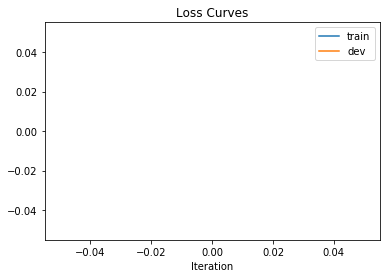

In [14]:
plot(train_losses, dev_losses, title='Loss Curves')

In [ ]:
plt.plot(dev_map)
plt.plot(train_map)

In [ ]:
def calculate_mean_image():
    '''
    calculate the mean image on the training set at 
    different sizes, (270, 480) and (540, 960)
    '''
    IMAGE_DIR = '../Data/FullData/RawImages/'
    DATA_PATH = '../Data/FullData/train_dev_test.npy'
    image_paths = [os.path.join(IMAGE_DIR, f) for f in np.load(DATA_PATH).item()['train']]
    mean_270, mean_540 = np.zeros((480, 270, 3)), np.zeros((960, 540, 3))
    for img in tqdm(image_paths):
        mean_270 += resized_image((1080//4, 1920//4), img)
        mean_540 += resized_image((1080//2, 1920//2), img)
    N = len(image_paths)
    return mean_270 / N, mean_540 / N

def resized_image(size, path):
    with Image.open(path) as img:
        img = img.resize(size, resample=Image.BILINEAR)
        img = np.asarray(img)
    return img

In [ ]:
# s, l = calculate_mean_image()
mean_image_s, mean_image_l = (
    Image.fromarray(s.astype('uint8'), 'RGB'), 
    Image.fromarray(l.astype('uint8'), 'RGB')
)

In [ ]:
np.save('../Data/FullData/270_480_mean.npy', s)
np.save('../Data/FullData/540_960_mean.npy', l)

In [ ]:
Image.fromarray(s.astype('uint8'), 'RGB')